### Домашнее задание "Теория оптимизации".
При фиксированном seed=42 поразбирайтесь и поэкспериментируйте с параметрами алгоритма дифференциальной эволюции: strategy, popsize, tol, mutation, recombination и updating.

Постройте графики количества итераций оптимизации функции ackley от значения параметра.

Дополнительное задание:   
Найти множество параметров (strategy=..., ..., updating=...), которые требуют минимального количества итераций.

In [87]:
import numpy as np
import pandas as pd
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 18,8

In [241]:
#Изначально заданная функция + параметры differential_evolution по умолчанию.
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e
bounds = [(-10, 10), (-10, 10)]
result = differential_evolution(ackley, bounds, seed=42)
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2793
     nit: 90
 success: True
       x: array([0., 0.])

In [113]:
# 1) Параметр strategy
strategy = ['best1bin', 'best1exp', 'rand1exp', 'randtobest1exp', 'currenttobest1exp', 'best2exp', 'rand2exp', 'randtobest1bin', 'currenttobest1bin', 'best2bin', 'rand2bin', 'rand1bin']

                      0
best1bin             90
best1exp            147
rand1exp            246
randtobest1exp      156
currenttobest1exp  1000
best2exp            244
rand2exp            341
randtobest1bin      101
currenttobest1bin  1000
best2bin            166
rand2bin            232
rand1bin            168


<Figure size 1080x504 with 0 Axes>

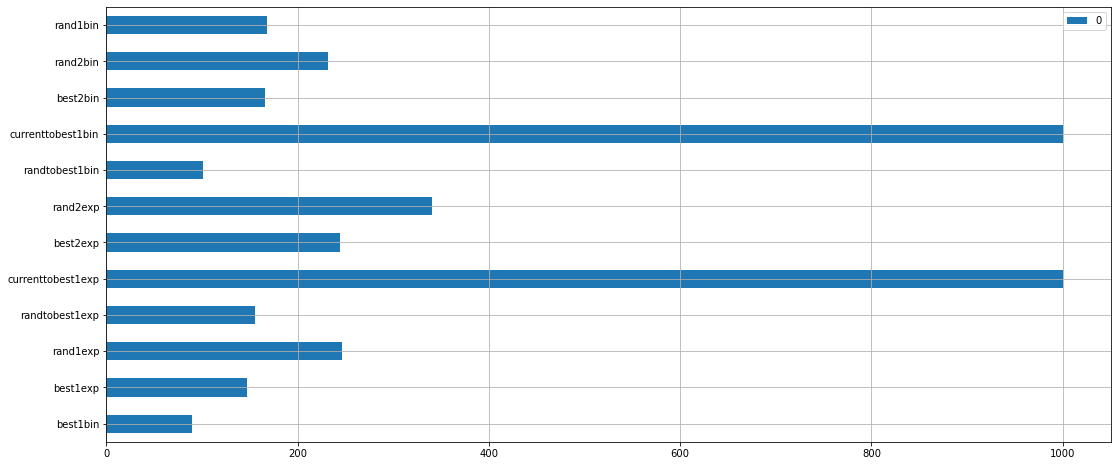

In [218]:
strat_nit2 = {}
for i in strategy:
    result = differential_evolution(ackley, bounds, seed=42, strategy = i)
    strat_nit2[i] = result.nit
plt.figure(figsize=(15,7))    
strat_nit2  = pd.DataFrame.from_records([strat_nit2]).T
print(strat_nit2)

strat_nit2.plot.barh()
plt.grid()
plt.show()
# Получается, что стратегия, которая установлена по умолчанию (best1bin) наиболее оптимальная по кол-ву итераций

    5   10  13  14  15   16  17  20  25  30  35  40  45  50
0  100  97  96  99  90  102  97  95  94  99  96  98  95  98


<Figure size 1080x504 with 0 Axes>

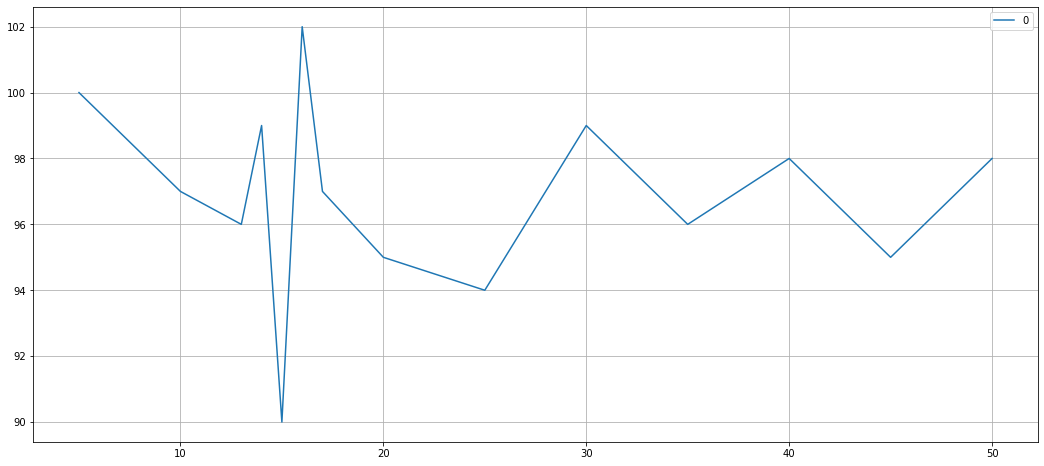

In [226]:
# 2) Параметр popsize со стратегией по умолчанию best1bin
PS = [5, 10, 13, 14, 15, 16, 17, 20, 25, 30, 35, 40, 45, 50]
popsize2 = {}
for i in PS:
    result = differential_evolution(ackley, bounds, seed=42, popsize = i)
    popsize2[i] = result.nit
plt.figure(figsize=(15,7))    
popsize2  = pd.DataFrame.from_records([popsize2]).T
print(popsize2.T)

popsize2.plot()
plt.grid()
plt.show()
# наиболее оптимальным значением параметра оказалось значение popsize = 15

   1.000000e-10  1.000000e-04  1.000000e-03  1.000000e-02  2.000000e-01  \
0            90            90            90            90            90   

   3.000000e-01  4.000000e-01  5.000000e-01  1.000000e+00  
0            90             1             1             1  


<Figure size 1080x504 with 0 Axes>

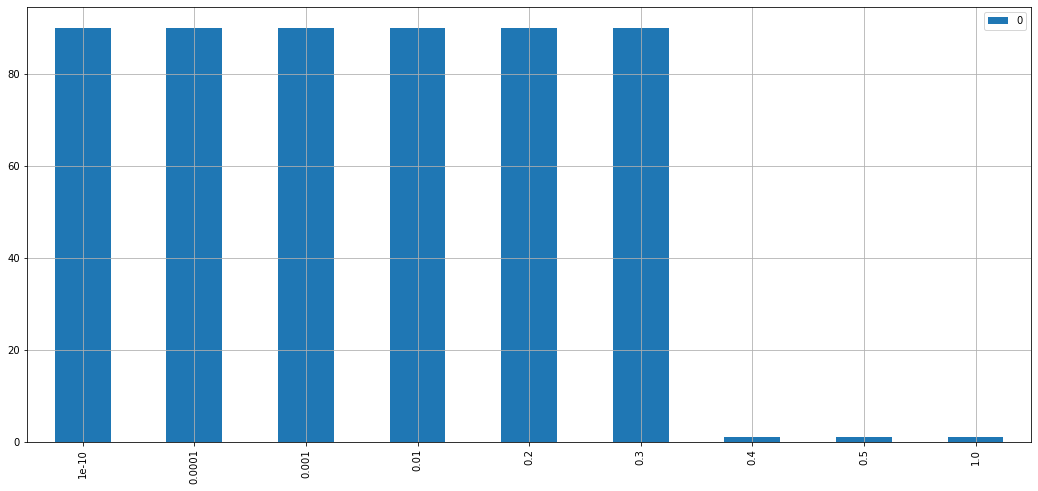

In [227]:
# 3) Параметр tol со стратегией по умолчанию best1bin
tl = [1e-10, 0.0001, 0.001, 0.01, 0.2, 0.3, 0.4, 0.5, 1]
tol2 = {}
for i in tl:
    result = differential_evolution(ackley, bounds, seed=42, tol = i)
    tol2[i] = result.nit
plt.figure(figsize=(15,7))    
tol2  = pd.DataFrame.from_records([tol2]).T
print(tol2.T)

tol2.plot.bar()
plt.grid()
plt.show()

   0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.0  1.3  1.5  1.7  1.9
0    4    5    5   40   41   49   53   55   67   73   78   89


<Figure size 1080x504 with 0 Axes>

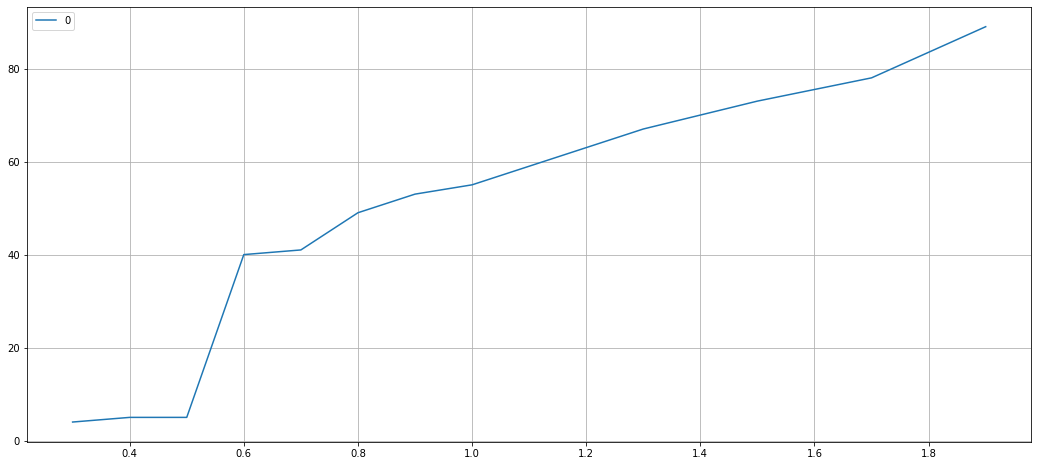

In [234]:
# 4) Параметр mutation со стратегией по умолчанию best1bin
mut = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.3, 1.5, 1.7, 1.9]
mutation2 = {}
for i in mut:
    result = differential_evolution(ackley, bounds, seed=42, mutation = (0.1, i))
    mutation2[i] = result.nit
plt.figure(figsize=(15,7))    
mutation2  = pd.DataFrame.from_records([mutation2]).T
print(mutation2.T)

mutation2.plot()
plt.grid()
plt.show()

   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.0
0  126  110  108  108  107   96   90   84   85   82


<Figure size 1080x504 with 0 Axes>

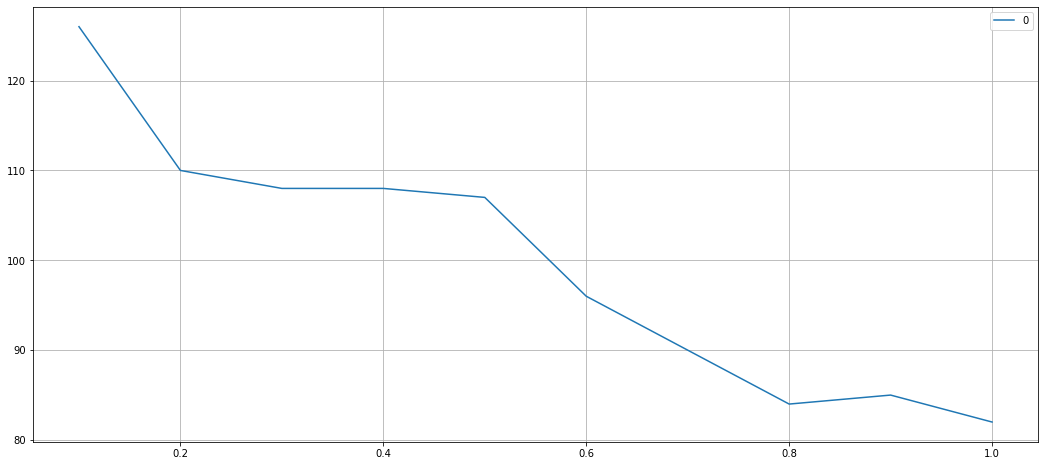

In [214]:
# 5) Параметр recombination со стратегией по умолчанию best1bin
rem = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
recomb = {}
for i in rem:
    result = differential_evolution(ackley, bounds, seed=42, recombination = i)
    recomb[i] = result.nit
plt.figure(figsize=(15,7))    
recomb  = pd.DataFrame.from_records([recomb]).T
print(recomb.T)

recomb.plot()
plt.grid()
plt.show()

   immediate  deferred
0         90       122


<Figure size 1080x504 with 0 Axes>

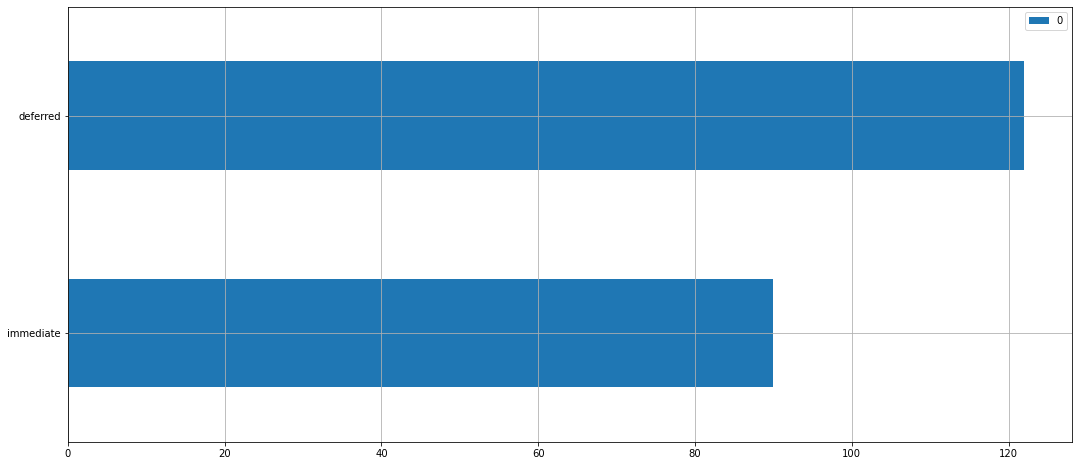

In [215]:
# 6) Параметр updating со стратегией по умолчанию best1bin
upd = ['immediate', 'deferred']
updat = {}
for i in upd:
    result = differential_evolution(ackley, bounds, seed=42, updating = i)
    updat[i] = result.nit
plt.figure(figsize=(15,7))    
updat  = pd.DataFrame.from_records([updat]).T
print(updat.T)

updat.plot.barh()
plt.grid()
plt.show()

In [240]:
# 7) Попробовала вручную подобрать оптимальные параметры для минимизации кол-ва итераций
# получила то же мин значение за 29 итераций, в отличии от запуска differential_evolution с параметрами по умолчанию (90 итераций)
result = differential_evolution(ackley, bounds, seed=42, strategy = 'best1bin', tol = 0.3, mutation = (0.1, 0.4), popsize = 15, recombination = 0.8, updating = 'immediate')
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 963
     nit: 29
 success: True
       x: array([0., 0.])